In [1]:
import hyperneat

In [2]:
args = dict()
args['pop_size'] = 20
args['add_node_prob'] = 0.3
args['add_edge_prob'] = 0.5
args['activ_prob'] = 0.3
args['bias_prob'] = 0.5
args['weight_prob'] = 0.5
args['cross_prob'] = 0.9
args['selection_thresh'] = 0.6
args['distance_thresh'] = 0.4
args['weight_excess'] = 0.2
args['weight_disjoint'] = 0.4
args['weight_node_diff'] = 0.2
args['weight_node_fun'] = 0.2
epochs = 10

In [3]:
input_dim = (4, 2)
hidden_dim = (4, 10)
output_dim = (2, 1)
hidden_activation = hyperneat.activations.np_sigmoid
output_activation = hyperneat.activations.np_softmax
data_path = "./data/diabetes1.dt"

In [4]:
net = hyperneat.Substrate(input_dim, hidden_dim, output_dim, hidden_activation, output_activation)
dataset = hyperneat.DiabetesDataset(data_path)

In [5]:
total = []
fitness = []
crossover = []
mutation = []

### No threading

Epoch: 1 Fitness:0.63344890899634 CE: 0.63344890899634 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 5.346233804061522
Epoch: 2 Fitness:0.6346070257728322 CE: 0.6346070257728322 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.7177738736040777
Epoch: 3 Fitness:0.6346078654273158 CE: 0.6346078654273158 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6861251930258763
Epoch: 4 Fitness:0.6346078654273158 CE: 0.6346078654273158 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6807927733946628
Epoch: 5 Fitness:0.6346078654273158 CE: 0.6346078654273158 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6564552163442676
Epoch: 6 Fitness:0.6346078654273158 CE: 0.6346078654273158 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.766160574133211
Epoch: 7 Fitness:0.6328806116716894 CE: 0.6328806116716894 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6629126288242236
Epoch: 8 Fitness:0.6336235

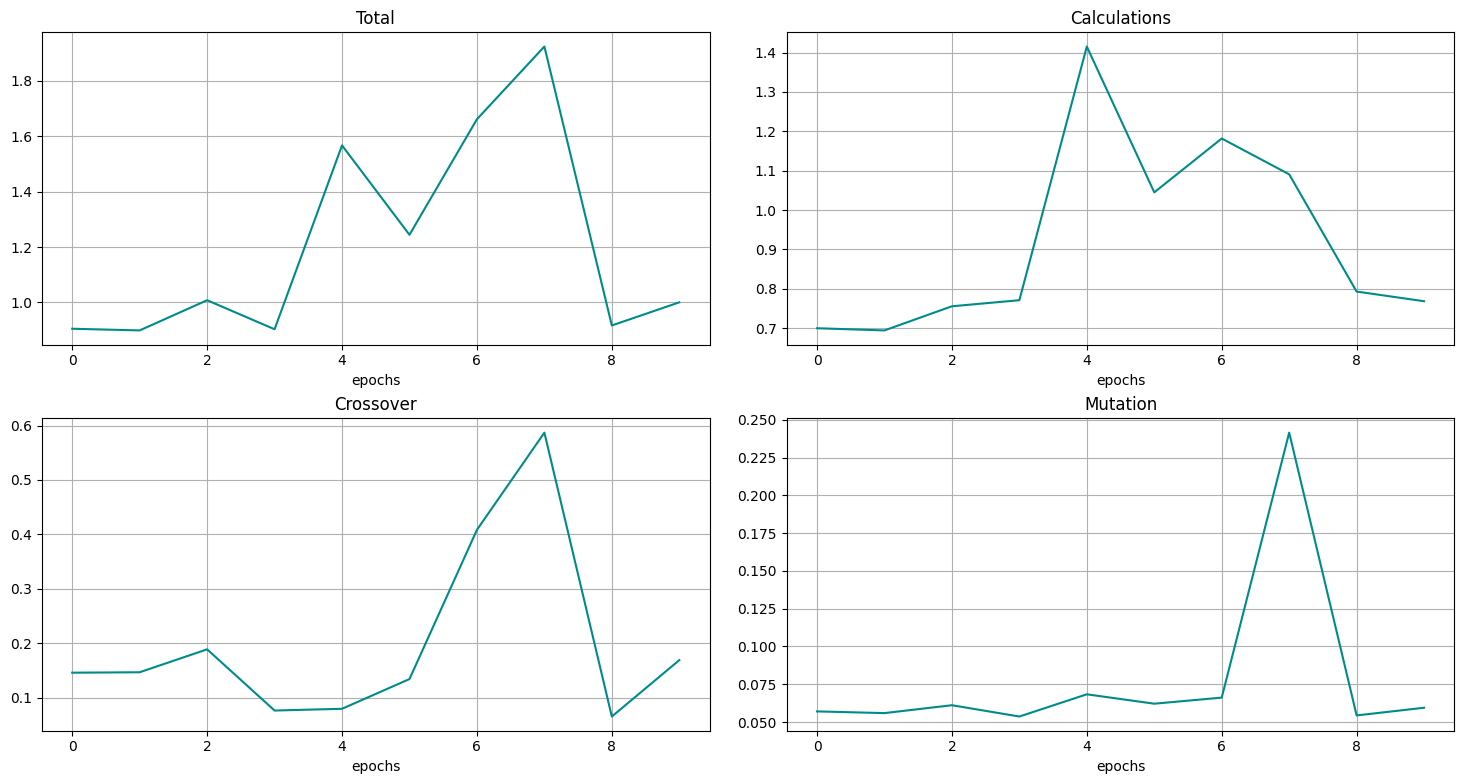

In [6]:
pop = hyperneat.Population(args)
pop.parallel_evolve(epochs=epochs,
                    net=net,
                    data=dataset.train_data,
                    process_num=1,
                    save=False)
total.append(sum(pop.time_execution['total']))
fitness.append(sum(pop.time_execution['fitness']) / 10)
crossover.append(sum(pop.time_execution['crossover']) / 10)
mutation.append(sum(pop.time_execution['mutation']) / 10)
print("=====================================================================================")
print(f"TOTAL = {total[-1]} AVG_FITNESS = {fitness[-1]} AVG_CROSSOVER = {crossover[-1]} AVG_MUTATION = {mutation[-1]}")
hyperneat.plot_time_execution(pop, show=True)

### 2 threads

Epoch: 1 Fitness:0.6434649514283631 CE: 0.6434649514283631 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 6.549428625518648
Epoch: 2 Fitness:0.6377690875608096 CE: 0.6377690875608096 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6957102299938719
Epoch: 3 Fitness:0.6269648488647976 CE: 0.6269648488647976 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.7884951969166667
Epoch: 4 Fitness:0.6266542924740874 CE: 0.6266542924740874 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.8222748272102856
Epoch: 5 Fitness:0.6249519065646204 CE: 0.6249519065646204 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6527512854033605
Epoch: 6 Fitness:0.624074137858623 CE: 0.624074137858623 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6469911211288502
Epoch: 7 Fitness:0.624074137858623 CE: 0.624074137858623 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.1987805888916996
Epoch: 8 Fitness:0.623305

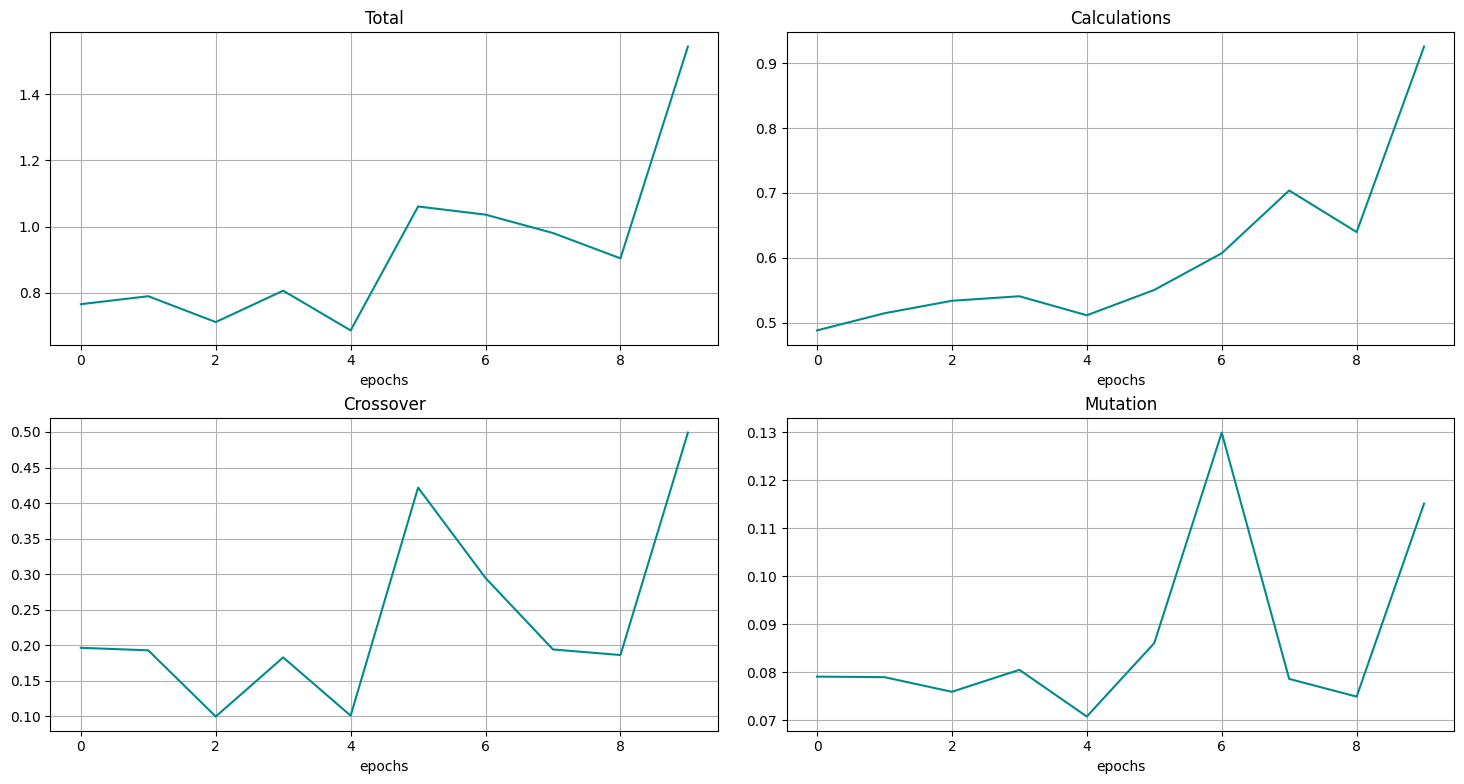

In [7]:
pop = hyperneat.Population(args)
pop.parallel_evolve(epochs=epochs,
                    net=net,
                    data=dataset.train_data,
                    process_num=2,
                    save=False)
total.append(sum(pop.time_execution['total']))
fitness.append(sum(pop.time_execution['fitness']) / 10)
crossover.append(sum(pop.time_execution['crossover']) / 10)
mutation.append(sum(pop.time_execution['mutation']) / 10)
print("=====================================================================================")
print(f"TOTAL = {total[-1]} AVG_FITNESS = {fitness[-1]} AVG_CROSSOVER = {crossover[-1]} AVG_MUTATION = {mutation[-1]}")
hyperneat.plot_time_execution(pop, show=True)

### 4 threads

Epoch: 1 Fitness:0.6320829980693978 CE: 0.6320829980693978 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.527679695817597
Epoch: 2 Fitness:0.6272015652968012 CE: 0.6272015652968012 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6838268446954796
Epoch: 3 Fitness:0.6296884680159179 CE: 0.6296884680159179 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 2.4379753356713847
Epoch: 4 Fitness:0.6269151409197605 CE: 0.6269151409197605 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.8883311981170254
Epoch: 5 Fitness:0.6224429677124944 CE: 0.6224429677124944 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6632124769300688
Epoch: 6 Fitness:0.6224429677124944 CE: 0.6224429677124944 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6581340879871519
Epoch: 7 Fitness:0.625804691449032 CE: 0.625804691449032 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6700607495731653
Epoch: 8 Fitness:0.6300

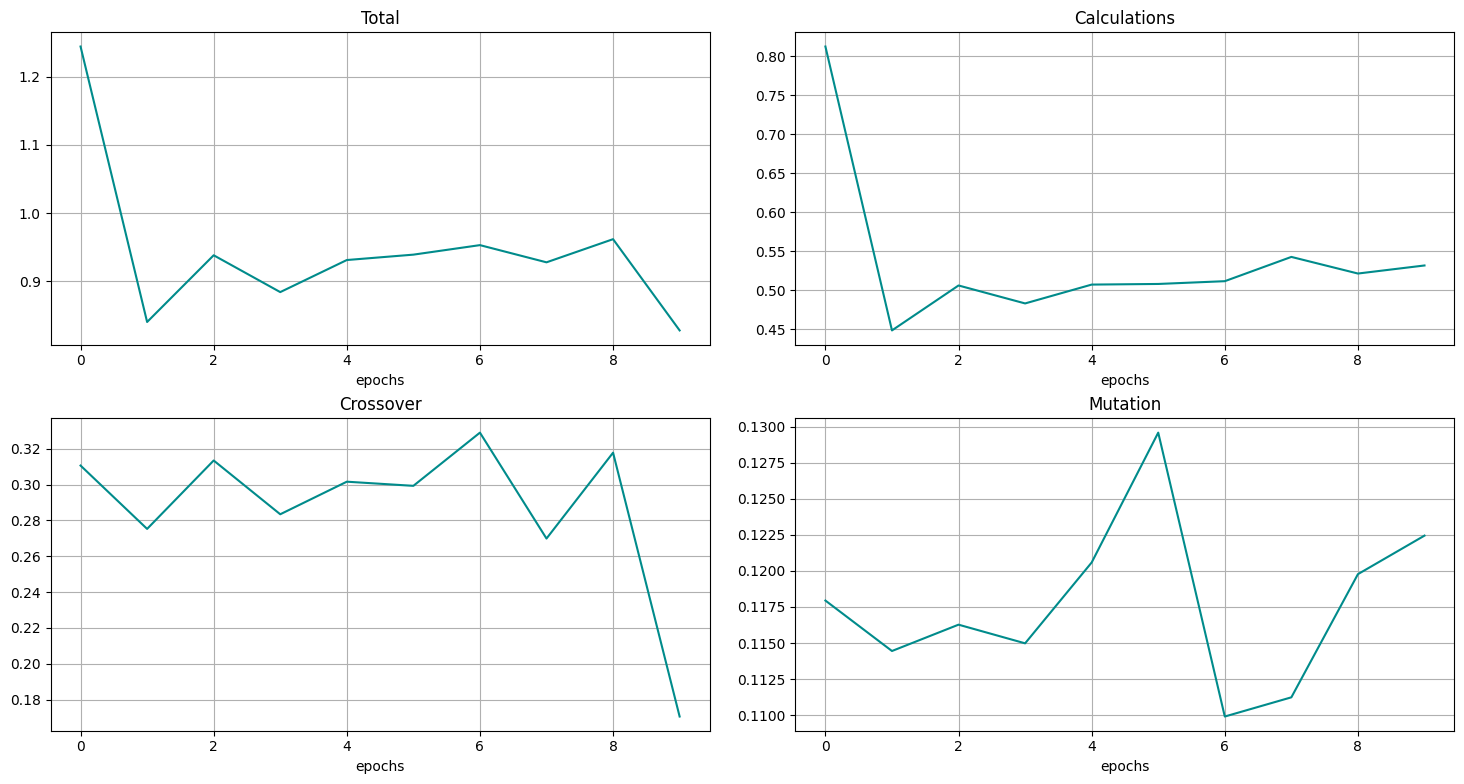

In [8]:
pop = hyperneat.Population(args)
pop.parallel_evolve(epochs=epochs,
                    net=net,
                    data=dataset.train_data,
                    process_num=4,
                    save=False)
total.append(sum(pop.time_execution['total']))
fitness.append(sum(pop.time_execution['fitness']) / 10)
crossover.append(sum(pop.time_execution['crossover']) / 10)
mutation.append(sum(pop.time_execution['mutation']) / 10)
print("=====================================================================================")
print(f"TOTAL = {total[-1]} AVG_FITNESS = {fitness[-1]} AVG_CROSSOVER = {crossover[-1]} AVG_MUTATION = {mutation[-1]}")
hyperneat.plot_time_execution(pop, show=True)

### 6 threads

In [9]:
pop = hyperneat.Population(args)
pop.parallel_evolve(epochs=epochs,
                    net=net,
                    data=dataset.train_data,
                    process_num=6,
                    save=False)
total.append(sum(pop.time_execution['total']))
fitness.append(sum(pop.time_execution['fitness']) / 10)
crossover.append(sum(pop.time_execution['crossover']) / 10)
mutation.append(sum(pop.time_execution['mutation']) / 10)
print("=====================================================================================")
print(f"TOTAL = {total[-1]} AVG_FITNESS = {fitness[-1]} AVG_CROSSOVER = {crossover[-1]} AVG_MUTATION = {mutation[-1]}")
hyperneat.plot_time_execution(pop, show=True)

Epoch: 1 Fitness:0.6335746657864068 CE: 0.6335746657864068 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 4.192078784864128
Epoch: 2 Fitness:0.6332215683878567 CE: 0.6332215683878567 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.7779800664565967
Epoch: 3 Fitness:0.6332722328205104 CE: 0.6332722328205104 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.692846292840094
Epoch: 4 Fitness:0.6332722328205104 CE: 0.6332722328205104 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.2548663182201516
Epoch: 5 Fitness:0.6330237447369871 CE: 0.6330237447369871 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 2.4635683190165145
Epoch: 6 Fitness:0.6319609441914417 CE: 0.6319609441914417 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.7022679238289785
Epoch: 7 Fitness:0.6336585052101333 CE: 0.6336585052101333 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6882789983220942
Epoch: 8 Fitness:0.632

### 8 threads

In [10]:
pop = hyperneat.Population(args)
pop.parallel_evolve(epochs=epochs,
                    net=net,
                    data=dataset.train_data,
                    process_num=8,
                    save=False)
total.append(sum(pop.time_execution['total']))
fitness.append(sum(pop.time_execution['fitness']) / 10)
crossover.append(sum(pop.time_execution['crossover']) / 10)
mutation.append(sum(pop.time_execution['mutation']) / 10)
print("=====================================================================================")
print(f"TOTAL = {total[-1]} AVG_FITNESS = {fitness[-1]} AVG_CROSSOVER = {crossover[-1]} AVG_MUTATION = {mutation[-1]}")
hyperneat.plot_time_execution(pop, show=True)

Epoch: 1 Fitness:0.6443219381118062 CE: 0.6443219381118062 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 4.802529523950283
Epoch: 2 Fitness:0.635405266571648 CE: 0.635405266571648 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.7085398102227375
Epoch: 3 Fitness:0.6308100028462946 CE: 0.6308100028462946 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.3691346276440244
Epoch: 4 Fitness:0.6273153236967356 CE: 0.6273153236967356 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.8231685406625542
Epoch: 5 Fitness:0.6293824728158547 CE: 0.6293824728158547 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.818829165985403
Epoch: 6 Fitness:0.6293073352858144 CE: 0.6293073352858144 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.638997000830715
Epoch: 7 Fitness:0.627780417691454 CE: 0.627780417691454 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.8123683937137707
Epoch: 8 Fitness:0.62634101

### 10 threads

In [11]:
pop = hyperneat.Population(args)
pop.parallel_evolve(epochs=epochs,
                    net=net,
                    data=dataset.train_data,
                    process_num=10,
                    save=False)
total.append(sum(pop.time_execution['total']))
fitness.append(sum(pop.time_execution['fitness']) / 10)
crossover.append(sum(pop.time_execution['crossover']) / 10)
mutation.append(sum(pop.time_execution['mutation']) / 10)
print("=====================================================================================")
print(f"TOTAL = {total[-1]} AVG_FITNESS = {fitness[-1]} AVG_CROSSOVER = {crossover[-1]} AVG_MUTATION = {mutation[-1]}")
hyperneat.plot_time_execution(pop, show=True)

Epoch: 1 Fitness:0.6493683524973962 CE: 0.6493683524973962 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 3.2960654729563585
Epoch: 2 Fitness:0.6493683524973962 CE: 0.6493683524973962 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.8150176464835317
Epoch: 3 Fitness:0.6392861616674655 CE: 0.6392861616674655 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.4502617966657456
Epoch: 4 Fitness:0.636699262086153 CE: 0.636699262086153 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.8072181390040871
Epoch: 5 Fitness:0.6516806407229291 CE: 0.6516806407229291 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.8494396136306652
Epoch: 6 Fitness:0.6367910745895906 CE: 0.6367910745895906 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6880039049242349
Epoch: 7 Fitness:0.6367910745895906 CE: 0.6367910745895906 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 2.0524737849039862
Epoch: 8 Fitness:0.625

### 12 threads

In [12]:
pop = hyperneat.Population(args)
pop.parallel_evolve(epochs=epochs,
                    net=net,
                    data=dataset.train_data,
                    process_num=12,
                    save=False)
total.append(sum(pop.time_execution['total']))
fitness.append(sum(pop.time_execution['fitness']) / 10)
crossover.append(sum(pop.time_execution['crossover']) / 10)
mutation.append(sum(pop.time_execution['mutation']) / 10)
print("=====================================================================================")
print(f"TOTAL = {total[-1]} AVG_FITNESS = {fitness[-1]} AVG_CROSSOVER = {crossover[-1]} AVG_MUTATION = {mutation[-1]}")
hyperneat.plot_time_execution(pop, show=True)

Epoch: 1 Fitness:0.6592914629092628 CE: 0.6592914629092628 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 2.7334535197332435
Epoch: 2 Fitness:0.6567734028440952 CE: 0.6567734028440952 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.9758938329538076
Epoch: 3 Fitness:0.6454290169262261 CE: 0.6454290169262261 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.7226143652256483
Epoch: 4 Fitness:0.6392302419027605 CE: 0.6392302419027605 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 2.3637364696853207
Epoch: 5 Fitness:0.6332742197938979 CE: 0.6332742197938979 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.2301649638282839
Epoch: 6 Fitness:0.633228643085186 CE: 0.633228643085186 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.2080524952283767
Epoch: 7 Fitness:0.6306073716480594 CE: 0.6306073716480594 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.9261358405139475
Epoch: 8 Fitness:0.630

### 14 threads

Epoch: 1 Fitness:0.643978928771208 CE: 0.643978928771208 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 3.092393662687493
Epoch: 2 Fitness:0.6431461075823844 CE: 0.6431461075823844 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.7082930573396895
Epoch: 3 Fitness:0.644730661880745 CE: 0.644730661880745 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.4927168046274815
Epoch: 4 Fitness:0.6380798840164997 CE: 0.6380798840164997 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.826087590888028
Epoch: 5 Fitness:0.6367811451135653 CE: 0.6367811451135653 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6794948145104152
Epoch: 6 Fitness:0.6367811451135653 CE: 0.6367811451135653 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.6629118465093777
Epoch: 7 Fitness:0.6335892253230766 CE: 0.6335892253230766 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.8019891994220962
Epoch: 8 Fitness:0.6324780

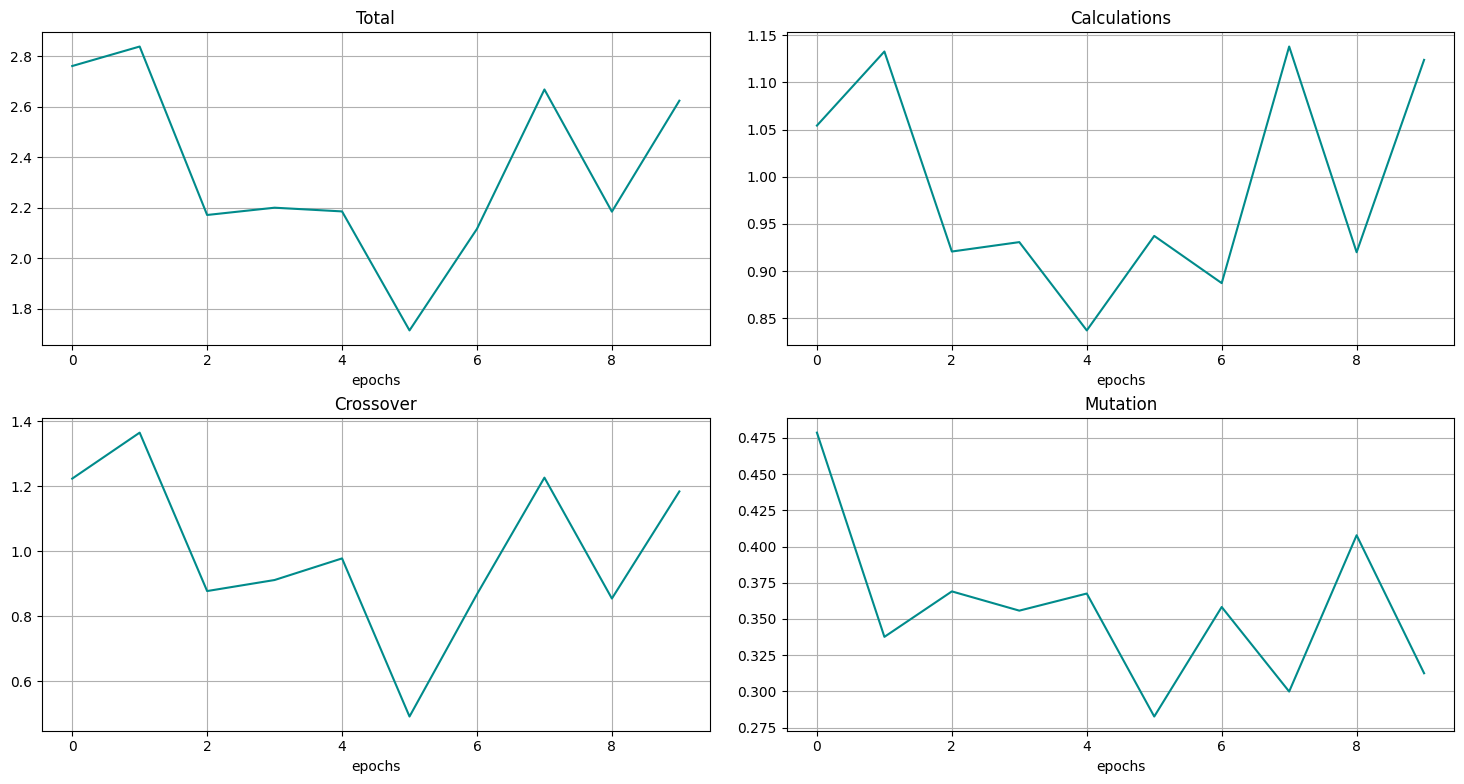

In [13]:
pop = hyperneat.Population(args)
pop.parallel_evolve(epochs=epochs,
                    net=net,
                    data=dataset.train_data,
                    process_num=14,
                    save=False)
total.append(sum(pop.time_execution['total']))
fitness.append(sum(pop.time_execution['fitness']) / 10)
crossover.append(sum(pop.time_execution['crossover']) / 10)
mutation.append(sum(pop.time_execution['mutation']) / 10)
print("=====================================================================================")
print(f"TOTAL = {total[-1]} AVG_FITNESS = {fitness[-1]} AVG_CROSSOVER = {crossover[-1]} AVG_MUTATION = {mutation[-1]}")
hyperneat.plot_time_execution(pop, show=True)

### 16 threads

Epoch: 1 Fitness:0.6361767673760904 CE: 0.6361767673760904 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 8.813998945378335
Epoch: 2 Fitness:0.6345675644718108 CE: 0.6345675644718108 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 5.340785619587579
Epoch: 3 Fitness:0.634296373189729 CE: 0.634296373189729 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 3.3359167472652596
Epoch: 4 Fitness:0.6342962668941258 CE: 0.6342962668941258 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 3.0738457748109456
Epoch: 5 Fitness:0.633437674547507 CE: 0.633437674547507 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.3121794601574799
Epoch: 6 Fitness:0.6332278116020326 CE: 0.6332278116020326 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 1.2566307709043751
Epoch: 7 Fitness:0.6342716388104978 CE: 0.6342716388104978 Accuracy: 0.6692708333333334 F1: 0.8018720748829953 AVG_LOSS: 0.7196399410511729
Epoch: 8 Fitness:0.6309927

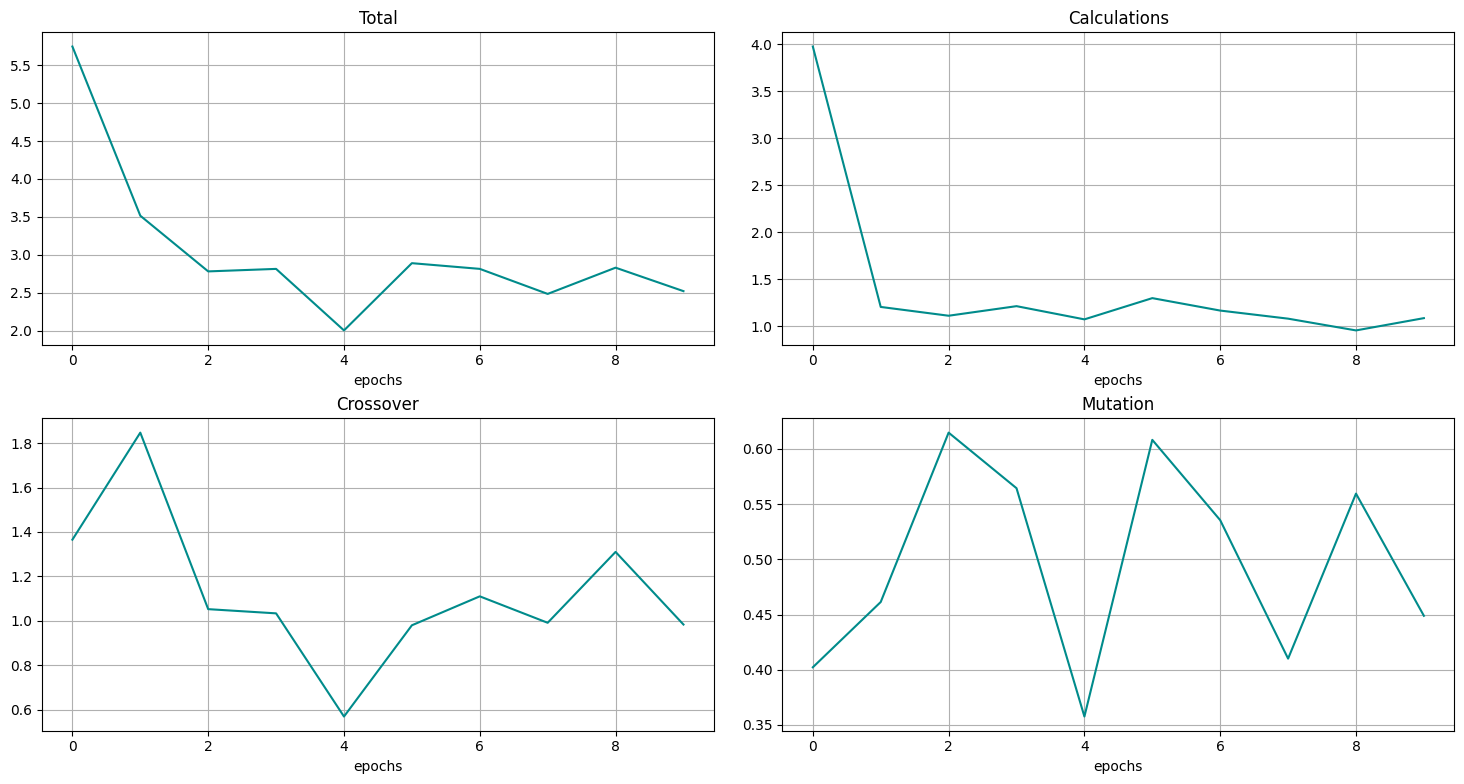

In [14]:
pop = hyperneat.Population(args)
pop.parallel_evolve(epochs=epochs,
                    net=net,
                    data=dataset.train_data,
                    process_num=16,
                    save=False)
total.append(sum(pop.time_execution['total']))
fitness.append(sum(pop.time_execution['fitness']) / 10)
crossover.append(sum(pop.time_execution['crossover']) / 10)
mutation.append(sum(pop.time_execution['mutation']) / 10)
print("=====================================================================================")
print(f"TOTAL = {total[-1]} AVG_FITNESS = {fitness[-1]} AVG_CROSSOVER = {crossover[-1]} AVG_MUTATION = {mutation[-1]}")
hyperneat.plot_time_execution(pop, show=True)

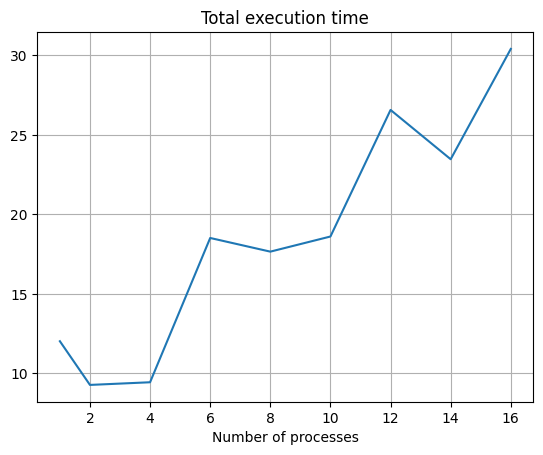

In [16]:
import matplotlib.pyplot as plt

x = [1, 2, 4, 6, 8, 10, 12, 14, 16]

plt.xlabel('Number of processes')
plt.title('Total execution time')
plt.grid()
plt.plot(x, total)

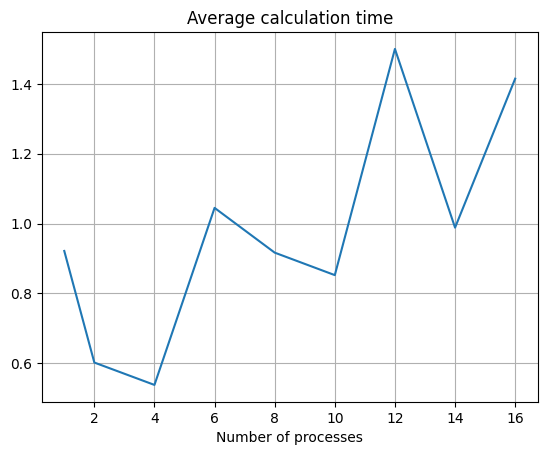

In [17]:
import matplotlib.pyplot as plt

x = [1, 2, 4, 6, 8, 10, 12, 14, 16]

plt.xlabel('Number of processes')
plt.title('Average calculation time')
plt.grid()
plt.plot(x, fitness)

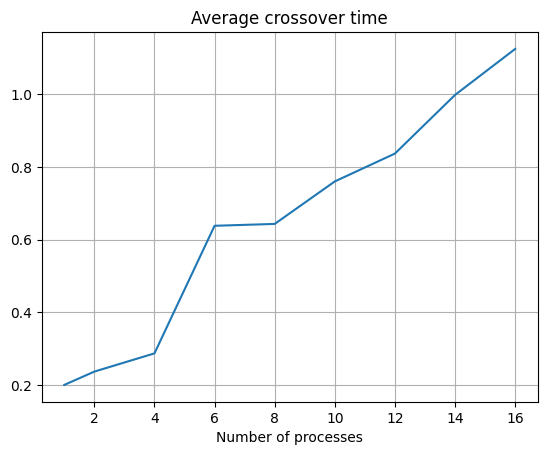

In [18]:
plt.xlabel('Number of processes')
plt.title('Average crossover time')
plt.grid()
plt.plot(x, crossover)

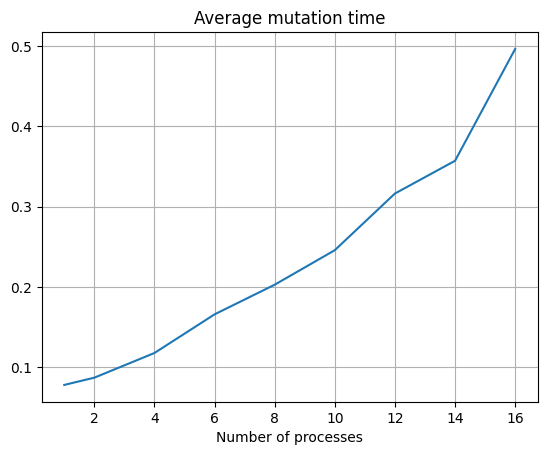

In [19]:
plt.xlabel('Number of processes')
plt.title('Average mutation time')
plt.grid()
plt.plot(x, mutation)